## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [22]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [23]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

In [4]:
# Calculate value counts for the Survived column

data.value_counts(['Survived'])


Survived
0           549
1           342
dtype: int64

First, check for missing data and remove all columns containing missing data

In [5]:
# Calculate NA values per column

data.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [24]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.

data = data.drop(['PassengerId','Name', 'Ticket'], axis = 1)


To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [25]:
data = data.drop(columns=['Age', 'Cabin', 'Embarked'], axis=1)

In [26]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Sex' has 2 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Fare' has 248 unique values


In [27]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.

sex = pd.get_dummies(data['Sex'], drop_first=True)
X = pd.concat([data.drop(['Survived', 'Sex'], axis=1), sex], axis=1)
y = data['Survived']


In [28]:
# Let's check the new columns

print(X.columns)
print(y)

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [29]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [30]:
from sklearn.neighbors import KNeighborsClassifier
# answer below:

knn = KNeighborsClassifier()
fit = knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print('train_score:', train_score)
print('test_score:', test_score)

train_score: 0.8398876404494382
test_score: 0.770949720670391


Would you say the model overfits? Why or why not? Put your answer in the comment below.

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [34]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)
print(k_list)

range(1, 15, 2)


For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [38]:
# answer below:

for k_values in k_list:
  knn = KNeighborsClassifier(n_neighbors=1)
  fit = knn.fit(X_train, y_train)
  accuracy_train.append(accuracy_score(y_train, knn.predict(X_train)))
  accuracy_test.append(accuracy_score(y_test, knn.predict(X_test)))
  f1_train.append(f1_score(y_train, knn.predict(X_train)))
  f1_test.append(f1_score(y_test, knn.predict(X_test)))

print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)

[0.8848314606741573, 0.8595505617977528, 0.8398876404494382, 0.8202247191011236, 0.8160112359550562, 0.8019662921348315, 0.7837078651685393, 0.8848314606741573, 0.8848314606741573, 0.8848314606741573, 0.8848314606741573, 0.8848314606741573, 0.8848314606741573, 0.8848314606741573]
[0.7206703910614525, 0.7541899441340782, 0.770949720670391, 0.7318435754189944, 0.7318435754189944, 0.7318435754189944, 0.7430167597765364, 0.7206703910614525, 0.7206703910614525, 0.7206703910614525, 0.7206703910614525, 0.7206703910614525, 0.7206703910614525, 0.7206703910614525]
[0.8498168498168498, 0.8062015503875969, 0.7857142857142857, 0.7584905660377359, 0.7569573283858998, 0.7393715341959335, 0.72, 0.8498168498168498, 0.8498168498168498, 0.8498168498168498, 0.8498168498168498, 0.8498168498168498, 0.8498168498168498, 0.8498168498168498]
[0.6621621621621622, 0.6944444444444444, 0.7320261437908496, 0.6842105263157894, 0.6883116883116883, 0.6842105263157894, 0.7051282051282052, 0.6621621621621622, 0.662162162

In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

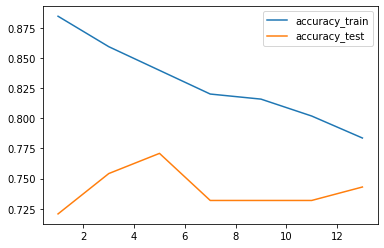

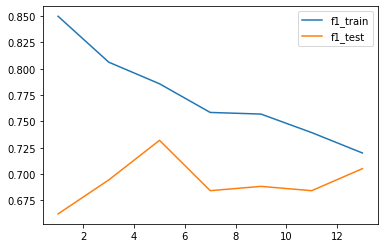

In [37]:
# answer below:

plt.figure()
plt.plot(k_list, accuracy_train)
plt.plot(k_list, accuracy_test)
plt.legend(['accuracy_train', 'accuracy_test'])
plt.show()

plt.figure()
plt.plot(k_list, f1_train)
plt.plot(k_list, f1_test)
plt.legend(['f1_train', 'f1_test'])
plt.show()


Please comment the results of the plots above

In [ ]:
# Add your observations in comments below.

